# 09 - Interpolação em Triângulos

Para essa atividade vamos usar o Numpy e Matplotlib. Assim vamos carregar as bibliotecas.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.tri as mtri


Vamos definir algumas funções auxiliares que vão nos ajudar a exibir os gráficos.

In [2]:
# Faz o setup para desenhar gráficos
def graph():
    fig = plt.figure()
    ax = plt.axes()
    plt.grid()
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.axhline(0, color='black') # deixa o X do eixo 0 em destaque
    ax.axvline(0, color='black') # deixa o Y do eixo 0 em destaque
    ax.set_aspect('equal') # Não suportado em todas as plataformas
    ax.set(xlabel='x', ylabel='y')
    fig.tight_layout()
    return ax

# Fonte: https://stackoverflow.com/questions/41596386/tripcolor-using-rgb-values-for-each-vertex
def colors_to_cmap(colors):
    colors = np.asarray(colors)
    if colors.shape[1] == 3:
        colors = np.hstack((colors, np.ones((len(colors),1))))
    steps = (0.5 + np.asarray(range(len(colors)-1), dtype=float))/(len(colors) - 1)
    return matplotlib.colors.LinearSegmentedColormap(
        'auto_cmap',
        {clrname: ([(0, col[0], col[0])] + 
                   [(step, c0, c1) for (step,c0,c1) in zip(steps, col[:-1], col[1:])] + 
                   [(1, col[-1], col[-1])])
         for (clridx,clrname) in enumerate(['red', 'green', 'blue', 'alpha'])
         for col in [colors[:,clridx]]},
        N=len(colors))

def draw_triangle(poly, colors):
    triangles = np.asarray([[0, 1, 2]])
    triang = mtri.Triangulation(poly[0], poly[1], triangles)
    cmap = colors_to_cmap(colors)
    zs = np.asarray(range(3), dtype=float)/2
    plt.tripcolor(triang, zs, cmap=cmap, shading='gouraud' )
    plt.grid()
    plt.scatter(poly[0], poly[1], s=20, color=colors)

O código abaixo desenha um triangulo com cores por vértice. Identifique as cores dos 3 pontos de teste (variável `prob`) usando coordenadas baricêntricas. 

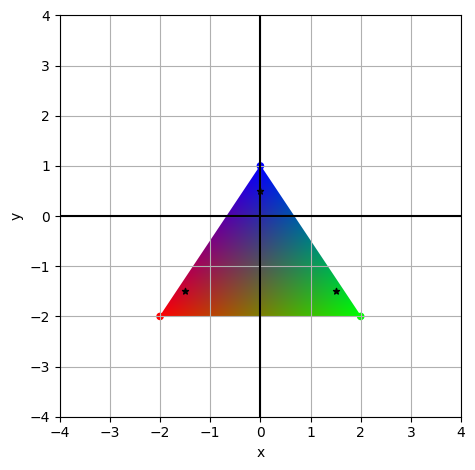

In [4]:
ax = graph() # configura o espaço para desenhar um gráfico 2D

# Vértices do triângulo
poly = np.array([[ -2.0,  2.0, 0.0],
                 [ -2.0, -2.0, 1.0]])

# Cores definidas para cada vértice do triângulo
colors = np.asarray( [[1.0,0.0,0.0],
                      [0.0,1.0,0.0], 
                      [0.0,0.0,1.0]] )

# Desenho do triângulo
draw_triangle(poly, colors) # Desenha triângulo colorido

# Pontos de teste
prob = np.array([[ -1.5,  1.5, 0.0],
                 [ -1.5, -1.5, 0.5]])
plt.scatter(prob[0], prob[1], s=20, marker="*", color="black")

plt.show()

In [12]:
def calculate_baricentric_coordinates(A, B, C, point):
    alpha = ((-(point[0] - B[0]) * (C[1] - B[1]) + (point[1] - B[1]) * (C[0] - B[0])) /
            (-(A[0] - B[0]) * (C[1] - B[1]) + (A[1] - B[1]) * (C[0] - B[0])))
    
    beta = ((-(point[0] - C[0]) * (A[1] - C[1]) + (point[1] - C[1]) * (A[0] - C[0])) /
            (-(B[0] - C[0]) * (A[1] - C[1]) + (B[1] - C[1]) * (A[0] - C[0])))
    
    gamma = 1 - alpha - beta 

    return round(alpha, 3), round(beta, 3), round(gamma, 3)

In [14]:
ponto_1 = (prob[0][0], prob[1][0])
ponto_2 = (prob[0][1], prob[1][1])
ponto_3 = (prob[0][2], prob[1][2])

points = [ponto_1, ponto_2, ponto_3]

for point in points:
    alpha, beta, gamma = calculate_baricentric_coordinates((poly[0][0], poly[1][0]), (poly[0][1], poly[1][1]), (poly[0][2], poly[1][2]), point)
    print(alpha, beta, gamma)
    color = alpha * colors[0][:] + beta * colors[1][:] + gamma * colors[2][:]
    print(color)
    color = [round(255*i) for i in color]
    print(color)

0.792 0.042 0.167
[0.792 0.042 0.167]
[202, 11, 43]
0.042 0.792 0.167
[0.042 0.792 0.167]
[11, 202, 43]
0.083 0.083 0.833
[0.083 0.083 0.833]
[21, 21, 212]
